In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

In [2]:
GOT_deathdata_path = "Resources/GOT_data_set.csv"

In [3]:
GOT_df = pd.read_csv(GOT_deathdata_path)
GOT_df.head()

,order,season,episode,character_killed,killer,method,method_cat,reason,location,allegiance,importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0


In [4]:
GOT_df.rename(columns={"order": "Order", "season": "Season", "episode":"Episode", "character_killed":"Character Killed", "killer":"Killer", 
                       "method":"Method", "method_cat":"Method Category", "reason":"Reason", "location":"Location", 
                       "allegiance":"Allegiance", "importance":"Importance"}, inplace=True)

GOT_df

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
0,1,1,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,1,1,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


In [5]:
GOT_df.drop(columns={"Season","Episode"})

,Order,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
0,1,Waymar Royce,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,"House Royce, Night’s Watch",2.0
1,2,Gared,White Walker,Ice sword,Blade,Unknown,Beyond the Wall,Night’s Watch,2.0
2,3,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
...,...,...,...,...,...,...,...,...,...
6882,6883,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


Most Dangerous Areas (by Kingdom)

In [6]:
#Identify the deadliest locations from the dataset and put the results into a panda data frame. I will utilize the top 3 locations for this exercise.
death_location = GOT_df["Location"].value_counts()
death_location_df = pd.DataFrame(death_location)
death_location_df.head(3)

,Location
Winterfell,3709
King’s Landing,1357
Beyond the Wall,993


***COPY CODE FROM HERE DOWN FOR EACH OF THE TOP 3 DEADLIEST AREAS***

In [7]:
#Use .loc to narrow down the data to show only deaths that occurend in Winterfell
Death_in_Winterfell_df = GOT_df.loc[GOT_df["Location"]== "Winterfell",:]
Death_in_Winterfell_df

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0
28,29,1,6,Wallen,Robb Stark,Sword,Blade,Attacked Bran Stark,Winterfell,Free Folk,2.0
...,...,...,...,...,...,...,...,...,...,...,...
5857,5858,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,None,1.0
5858,5859,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,None,1.0
5859,5860,8,3,Wight,Arya Stark,Magic,Magic,Killed during the Battle of Winterfell when th...,Winterfell,None,1.0
5860,5861,8,3,Jorah Mormont,Wight,Sword,Blade,Killed during the Battle of Winterfell when de...,Winterfell,"House Targaryen, House Mormont",4.0


In [8]:
#Narrow down the top 5 killeris in Winterfell. I will call for the top 15, as I look to seperate indivuals from groups and non-humans in the final presentation.
WF_Killers = Death_in_Winterfell_df["Killer"].value_counts()
WF_Killers_df = pd.DataFrame(WF_Killers)
WF_Killers_df.head(15)

,Killer
Wight,1558
Arya Stark,1215
Drogon,373
Rhaegal,102
Bolton soldier,90
Stark soldier,44
None,41
Jon Snow,35
Jorah Mormont,26
Theon Greyjoy,26


In [9]:
#Use Count function to find the total amount of deaths in Winterfell. This will also be used to help find the percentage of deaths each killer is responsible for.
Total_Deaths_WF = Death_in_Winterfell_df["Character Killed"].count()
Total_Deaths_WF

3709

In [10]:
#Use .div to find a percentage for total death each character is resposible for. Total kills was divided by total overall deaths in Winterfell.
Kill_percentWF = Death_in_Winterfell_df["Killer"].value_counts()
KP_resultWF = Kill_percentWF.div(Total_Deaths_WF).round(4)
KPR_percentWF = KP_resultWF*100
KPR_percentWF.head(15)

Wight                             42.01
Arya Stark                        32.76
Drogon                            10.06
Rhaegal                            2.75
Bolton soldier                     2.43
Stark soldier                      1.19
None                               1.11
Jon Snow                           0.94
Jorah Mormont                      0.70
Theon Greyjoy                      0.70
Tormund                            0.57
Unknown                            0.49
Greyjoy (Yara-aligned) soldier     0.46
Brienne of Tarth                   0.46
Jaime Lannister                    0.32
Name: Killer, dtype: float64

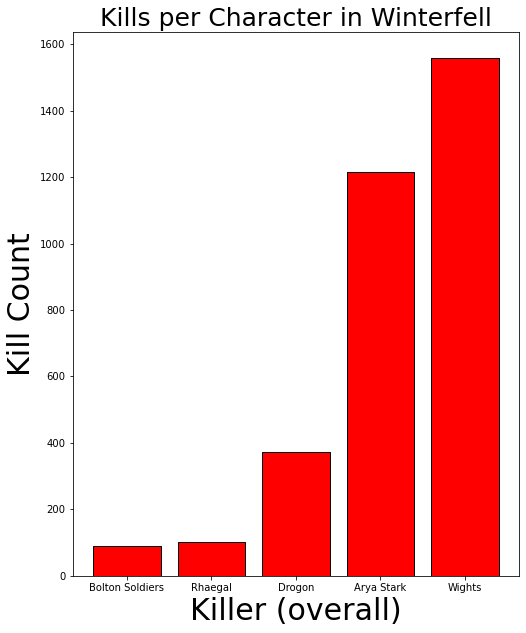

In [111]:
#Generate a Bar Chart using Matplotlib to show Kill Count from top five overall killers in Winterfell
#Unsuccessfully attempted to have the value show on the bar chart
x = ["Bolton Soldiers", "Rhaegal", "Drogon", "Arya Stark", "Wights"]
y = [90, 102, 373, 1215, 1558]
#for index, value in enumerate(y):
    #plt.text(value, index, str(value), fontsize=5)
plt.figure(figsize=(8,10), facecolor="white")
plt.bar(x, y, color=["red"], edgecolor='black')
plt.title("Kills per Character in Winterfell", fontsize=25)
plt.xlabel("Killer (overall)", fontsize=30)
plt.ylabel("Kill Count", fontsize=30)
plt.show()


In [112]:
#Code to show death in Winterfell, subtracting the Battle of Winterfell deaths that occured simultaneously with the death of Night King which skewed the data
USWF_DIW = Death_in_Winterfell_df[Death_in_Winterfell_df["Reason"].str.contains("Killed during the Battle of Winterfell when the Night King falls")==False]
USWF_DIW.head()

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
2,3,1,1,Will,Ned Stark,Sword (Ice),Blade,Deserting the Night’s Watch,Winterfell,Night’s Watch,2.0
3,4,1,1,Stag,Direwolf,Direwolf teeth,Animal,Unknown,Winterfell,None,1.0
4,5,1,1,Direwolf,Stag,Antler,Animal,Unknown,Winterfell,None,1.0
7,8,1,2,Catspaw assassin,Summer,Direwolf teeth,Animal,Attempting to kill Bran Stark,Winterfell,None,1.0
28,29,1,6,Wallen,Robb Stark,Sword,Blade,Attacked Bran Stark,Winterfell,Free Folk,2.0


In [114]:
#Show new dataframe that presents data that is not skewed from the death of Night King 
WF_Killers = USWF_DIW["Killer"].value_counts()
WF_Killers_df = pd.DataFrame(WF_Killers)
WF_Killers_df.head(15)

,Killer
Wight,1558
Drogon,373
Rhaegal,102
Bolton soldier,90
Stark soldier,44
None,41
Jon Snow,35
Jorah Mormont,26
Theon Greyjoy,26
Arya Stark,24


In [15]:
#Narrow down the top 5 allegiances the suffered the most casualties in Winterfell
Deathby_allegiance_WF = Death_in_Winterfell_df["Allegiance"].value_counts()
Deathby_allegiance_WF.head(10)

None                                         2701
House Targaryen                               781
House Stark                                   113
House Bolton                                   77
House Mormont, House Stark                      8
House Greyjoy (Yara-aligned), House Stark       7
House Baratheon of Dragonstone                  4
Free Folk                                       3
Smallfolk                                       2
House Stark, Free Folk                          2
Name: Allegiance, dtype: int64

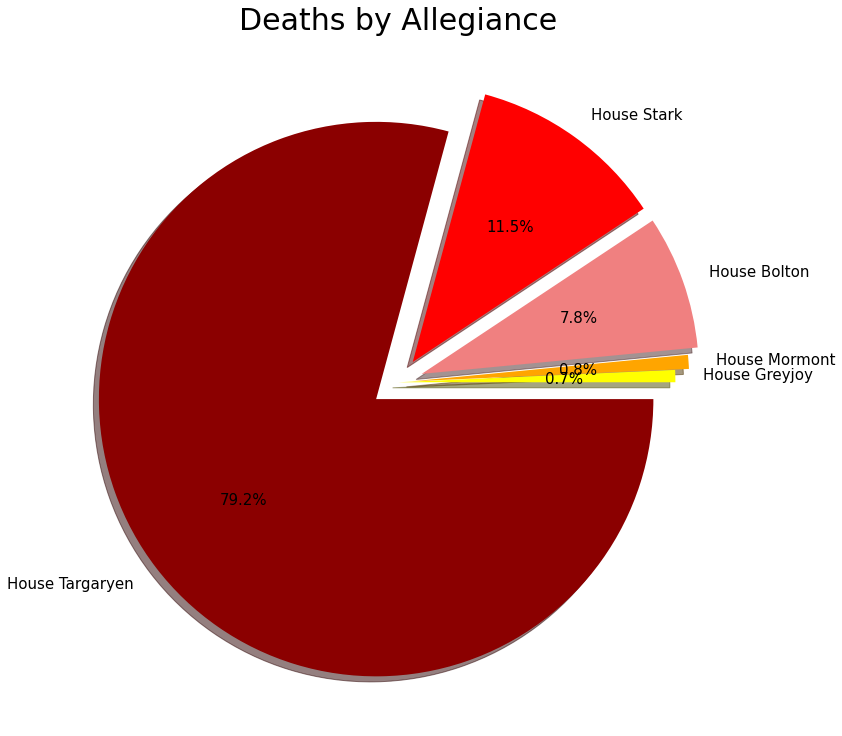

In [13]:
#Plot a pie chart to show the percentage of death that to top 5 Allegiances that experienced casualties in Winterfell
House= ["House Greyjoy", "House Mormont", "House Bolton", "House Stark", "House Targaryen"]
Deaths= [7,8,77,113,781]
plt.figure(figsize = (12.75, 12.75))
explode1 = (0.0, 0.05, 0.09, 0.09 ,.1)
colors = ["yellow","orange","lightcoral","red", "darkred"]
plt.title('Deaths by Allegiance', fontsize=30)
plt.pie(Deaths, explode=explode1, labels=House, colors=colors, shadow=True, autopct="%1.1f%%", textprops={"fontsize":15})
plt.show()

***END WINTERFELL***
***BEGIN KING'S LANDING***

In [14]:
#Use .loc to narrow down the data to show only deaths that occurend in King's Landing
Death_in_KL_df = GOT_df.loc[GOT_df["Location"]== "King’s Landing",:]
Death_in_KL_df

,Order,Season,Episode,Character Killed,Killer,Method,Method Category,Reason,Location,Allegiance,Importance
5,6,1,1,Jon Arryn,Lysa Arryn,Poison,Poison,Petyr Baelish persuaded Lysa to do so for reas...,King’s Landing,House Arryn,2.0
10,11,1,4,Ser Hugh of the Vale,Gregor “the Mountain” Clegane,Spear,Polearm,Killed during a tournament,King’s Landing,House Arryn,2.0
11,12,1,5,Clegane’s horse,Gregor “the Mountain” Clegane,Sword,Blade,Gregor was angry at being unhorsed in the tour...,King’s Landing,House Clegane,1.0
21,22,1,5,Stark soldier,Lannister soldier,Spear,Polearm,Jamie Lannister attacked because Catelyn Stark...,King’s Landing,House Stark,1.0
22,23,1,5,Stark soldier,Lannister soldier,Spear,Polearm,Jamie Lannister attacked because Catelyn Stark...,King’s Landing,House Stark,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6882,6883,8,5,Nora’s daughter,Drogon,Dragonfire,Animal,Killed when Daenerys Targaryen attacked King’s...,King’s Landing,Smallfolk,2.0
6883,6884,8,5,Jaime Lannister,Drogon,Rubble,Crushing,"Died together with Cersei, crushed under the c...",King’s Landing,House Lannister,4.0
6884,6885,8,5,Cersei Lannister,Drogon,Rubble,Crushing,"Died together with Jaime, crushed under the cr...",King’s Landing,House Lannister,4.0
6885,6886,8,6,Lannister soldier,Grey Worm,Knife,Blade,Executed on Daenerys Targaryen’s command to “k...,King’s Landing,House Lannister,1.0


In [15]:
#Narrow down the top 5 killeris in King's Landing. I will call for the top 15, as I look to seperate indivuals from groups and non-humans in the final presentation.
KL_Killers = Death_in_KL_df["Killer"].value_counts()
KL_Killers_df = pd.DataFrame(KL_Killers)
KL_Killers_df.head(15)

,Killer
Drogon,917
Cersei Lannister,199
Stark soldier,52
Baratheon of King’s Landing soldier,32
Dothraki rider,20
Bronn,15
Sandor “the Hound” Clegane,14
Grey Worm,14
Baratheon of Dragonstone soldier,11
Jon Snow,10


In [16]:
#Use Count function to find the total amount of deaths in King's Landing. This will also be used to help find the percentage of deaths each killer is responsible for.
Total_Deaths_KL = Death_in_KL_df["Character Killed"].count()
Total_Deaths_KL

1357

In [17]:
#Use .div to find a percentage for total death each character is resposible for. Total kills was divided by total overall deaths in Winterfell.
Kill_percentKL = Death_in_KL_df["Killer"].value_counts()
KP_resultKL = Kill_percentKL.div(Total_Deaths_KL).round(4)
KPR_percentKL = KP_resultKL*100
KPR_percentKL.head(15)

Drogon                                 67.58
Cersei Lannister                       14.66
Stark soldier                           3.83
Baratheon of King’s Landing soldier     2.36
Dothraki rider                          1.47
Bronn                                   1.11
Sandor “the Hound” Clegane              1.03
Grey Worm                               1.03
Baratheon of Dragonstone soldier        0.81
Jon Snow                                0.74
Gregor “the Mountain” Clegane           0.74
Lannister soldier                       0.74
Greyjoy (Yara-aligned) soldier          0.52
City watch guard                        0.44
Loras Tyrell                            0.29
Name: Killer, dtype: float64

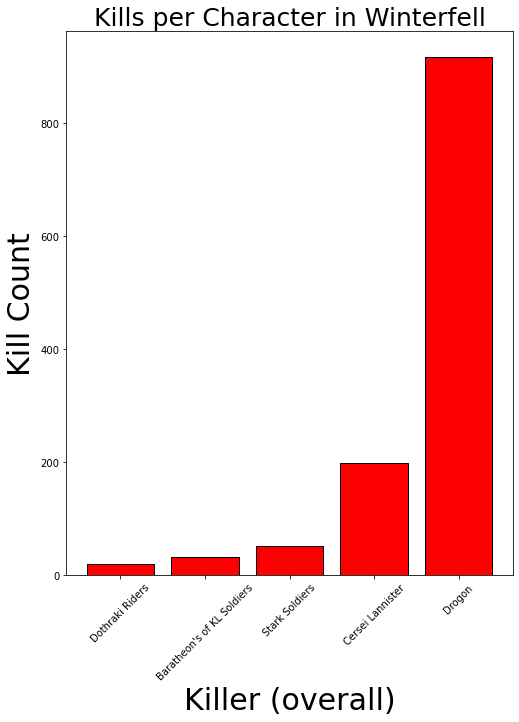

In [23]:
#Generate a Bar Chart using Matplotlib to show Kill Count from top five overall killers in King's Landing
#Unsuccessfully attempted to have the value show on the bar chart
x = ["Dothraki Riders", "Baratheon's of KL Soldiers", "Stark Soldiers", "Cersei Lannister", "Drogon"]
y = [20, 32, 52, 199, 917]
#for index, value in enumerate(y):
    #plt.text(value, index, str(value), fontsize=5)
plt.figure(figsize=(8,10), facecolor="white")
plt.bar(x, y, color=["red"], edgecolor='black')
plt.title("Kills per Character in Winterfell", fontsize=25)
plt.xlabel("Killer (overall)", fontsize=30)
plt.ylabel("Kill Count", fontsize=30)
plt.xticks(rotation=45)
plt.show()


In [24]:
#Narrow down the top 5 allegiances the suffered the most casualties in King's Landing
Deathby_allegiance_KL = Death_in_KL_df["Allegiance"].value_counts()
Deathby_allegiance_KL.head(10)

Golden Company, House Lannister      568
Smallfolk                            194
House Lannister                      188
Unknown                              166
House Greyjoy (Euron-aligned)         92
House Baratheon of Dragonstone        55
Faith Militant                        18
House Stark                           17
House Baratheon of King’s Landing     16
None                                   8
Name: Allegiance, dtype: int64

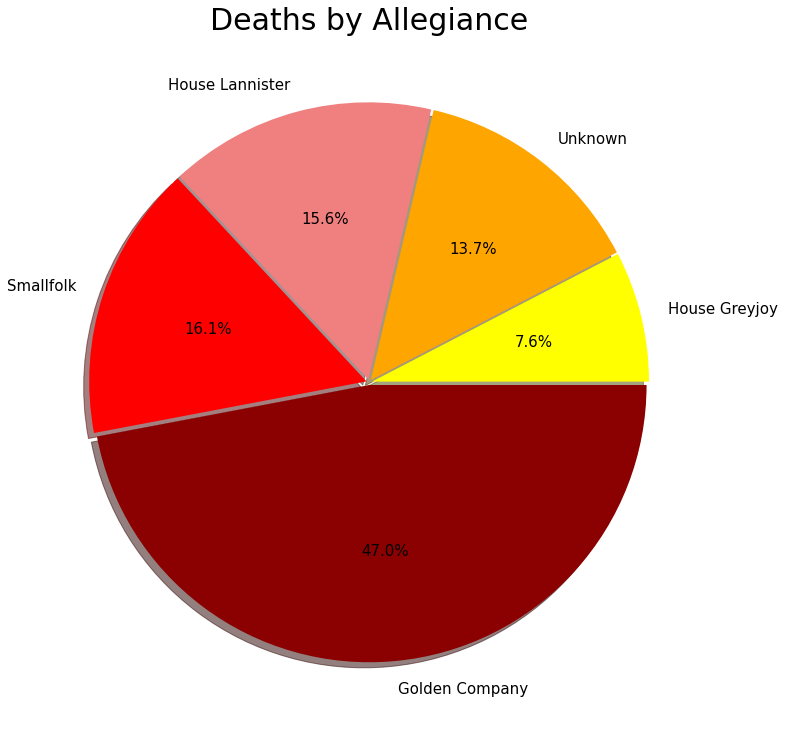

In [26]:
#Plot a pie chart to show the percentage of death that to top 5 Allegiances that experienced casualties in Winterfell
House= ["House Greyjoy", "Unknown", "House Lannister", "Smallfolk", "Golden Company"]
Deaths= [92,166,188,194,568]
plt.figure(figsize = (12.75, 12.75))
explode1 = (0.01, 0.01, 0.01, 0.01 ,.01)
colors = ["yellow","orange","lightcoral","red", "darkred"]
plt.title('Deaths by Allegiance', fontsize=30)
plt.pie(Deaths, explode=explode1, labels=House, colors=colors, shadow=True, autopct="%1.1f%%", textprops={"fontsize":15})
plt.show()

In [ ]:
END KING'S LANDING